In [1]:
# Google API dashboard:
# https://console.cloud.google.com/apis/dashboard?project=my-project-1543901530556&consoleReturnUrl=https:%2F%2Fcloud.google.com%2Fmaps-platform%2F%3Fapis%3Dmaps%26project%3Dmy-project-1543901530556&consoleUI=CLOUD&duration=PT1H
# Google elevation request guide:
# https://developers.google.com/maps/documentation/elevation/intro#ElevationRequests

In [2]:
# Import all packages and helpter functions
import sys
sys.path.append('../')
from utils import *

In [3]:
edge = pd.read_csv(raw_path + '5c_edges.csv')
print(edge.shape)
edge.head(3)

(1743, 14)


,access,geometry,highway,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,u,v
0,NaN,"LINESTRING (-117.7037585 34.1049333, -117.7037...",footway,0,NaN,35.446,NaN,NaN,False,551541821,NaN,NaN,5326481411,5326481407
1,NaN,"LINESTRING (-117.7037585 34.1049333, -117.7037...",footway,1,NaN,16.388,NaN,NaN,False,551541821,NaN,NaN,5326481411,5326481407
2,NaN,"LINESTRING (-117.7037585 34.1049333, -117.7037...",footway,0,NaN,92.226,NaN,NaN,False,"[556348964, 551541822]",NaN,NaN,5326481411,5366824714


We observe that edges are not simple line segments. It could have several nodes in there, and has different shapes, e.g. arcs or lines.

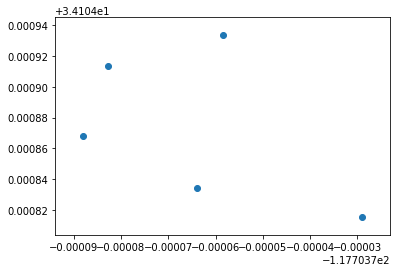

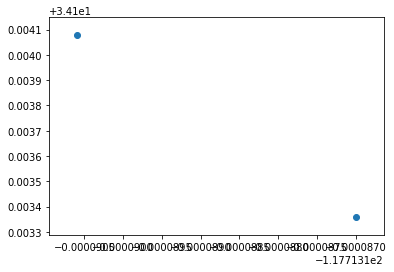

In [4]:
visualize_path(edge, 1)
visualize_path(edge, 100)

In [5]:
process_edge_rows(edge, 1)

([-117.7037585, -117.7037827, -117.703788, -117.7037639],
 [-117.7037827, -117.703788, -117.7037639, -117.703729],
 [34.1049333, 34.1049133, 34.1048678, 34.1048345],
 [34.1049133, 34.1048678, 34.1048345, 34.1048156],
 ['footway', 'footway', 'footway', 'footway'],
 [False, False, False, False],
 [1, 1, 1, 1])

In [6]:
clean_edge = defaultdict(list)
for idx in edge.index:
    y_start, y_end, x_start, x_end, highway, oneway, edge_index = process_edge_rows(edge, idx)
    clean_edge['y_start'] += y_start
    clean_edge['y_end'] += y_end
    clean_edge['x_start'] += x_start
    clean_edge['x_end'] += x_end
    clean_edge['highway'] += highway
    clean_edge['oneway'] += oneway
    clean_edge['edge_index'] += edge_index
clean_edge = pd.DataFrame(clean_edge)
clean_edge.head()

,y_start,y_end,x_start,x_end,highway,oneway,edge_index
0,-117.703759,-117.703734,34.104933,34.104949,footway,False,0
1,-117.703734,-117.703689,34.104949,34.104957,footway,False,0
2,-117.703689,-117.703646,34.104957,34.104950,footway,False,0
3,-117.703646,-117.703616,34.104950,34.104913,footway,False,0
4,-117.703616,-117.703603,34.104913,34.104876,footway,False,0


In [7]:
clean_edge.to_csv(mst_path + 'clean_edge.csv', index = None)